### **TF-IDF: Exercises**
 
- Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.
 
- In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other.
 
- For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!
 
- We are going to use techniques like Bag of grams, n-grams, TF-IDF, etc. for text representation and apply different classification algorithms.

### **About Data: Emotion Detection**

Credits: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp


- This data consists of two columns.
        - Comment
        - Emotion
- Comment are the statements or messages regarding to a particular event/situation.

- Emotion feature tells whether the given comment is fear 😨, Anger 😡, Joy 😂.

- As there are only 3 classes, this problem comes under the **Multi-Class Classification.**

In [1]:
import pandas as pd
#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df = pd.read_csv("Emotion_classify_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(5937, 2)


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [2]:
#check the distribution of Emotion
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [3]:
#Add the new column "Emotion_num" which gives a unique number to each of these Emotions
#joy --> 0, fear --> 1, anger --> 2
df['Emotion_num'] = df['Emotion'].apply(lambda x : 0 if x == 'joy'
                    else 1 if x == 'fear'
                    else 2)
#checking the results by printing top 5 rows
df.head()

,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,0
4,i feel suspicious if there is no one outside l...,fear,1


### **Modelling without Pre-processing Text data**

In [4]:
#import train-test split
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20%
#Note: Give Random state 2022 and also do the stratify sampling
X_train, X_test, y_train, y_test = train_test_split(
    df.Comment, 
    df.Emotion_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Emotion_num
)

In [5]:
#print the shapes of X_train and X_test
X_train.shape, X_test.shape

((4749,), (1188,))


**Attempt 1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [ ]:
#1. create a pipeline object
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tri_grams', CountVectorizer(ngram_range = (3, 3))),
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.25      0.35       400
           1       0.37      0.81      0.50       388
           2       0.54      0.20      0.30       400

    accuracy                           0.42      1188
   macro avg       0.49      0.42      0.38      1188
weighted avg       0.49      0.42      0.38      1188




**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier.
- print the classification report.


In [7]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (1, 2))),
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       400
           1       0.87      0.83      0.85       388
           2       0.83      0.88      0.85       400

    accuracy                           0.86      1188
   macro avg       0.86      0.86      0.86      1188
weighted avg       0.86      0.86      0.86      1188




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and Bigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [8]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_tri_grams', CountVectorizer(ngram_range = (1, 2))),
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       400
           1       0.93      0.90      0.91       388
           2       0.94      0.84      0.89       400

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188




**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using **TF-IDF vectorizer** for Pre-processing the text.
- use **RandomForest** as the classifier.
- print the classification report.


In [9]:
#import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       400
           1       0.91      0.91      0.91       388
           2       0.94      0.86      0.90       400

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [10]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 


#use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [11]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_comment'] = df['Comment'].apply(preprocess)

**Build a model with pre processed text**

In [12]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Use the preprocessed_Comment
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_comment, 
    df.Emotion_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Emotion_num
)

**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigrams and bigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [16]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))),
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       400
           1       0.94      0.91      0.93       388
           2       0.92      0.94      0.93       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



Text(95.72222222222221, 0.5, 'Truth')

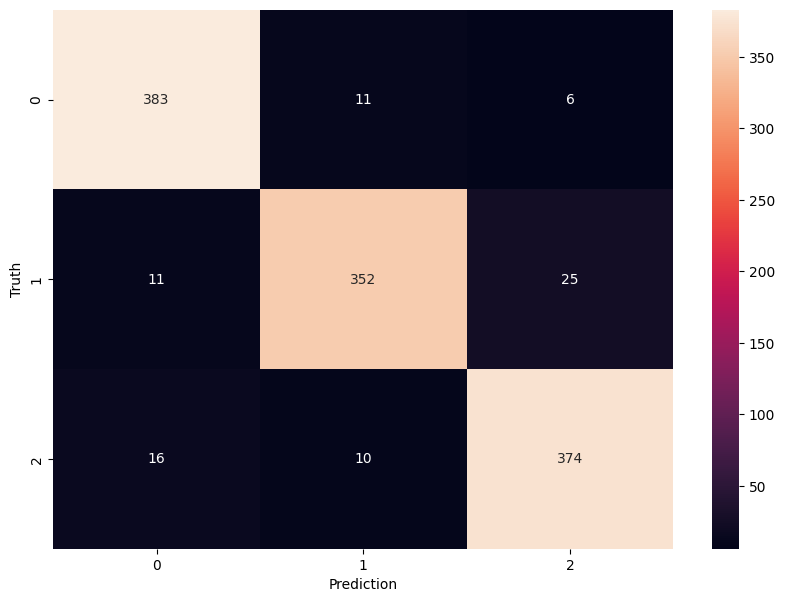

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the data.

**Note:**
- using **TF-IDF vectorizer** for pre-processing the text.
- use **RandomForest** as the classifier.
- print the classification report.


In [14]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       400
           1       0.94      0.93      0.93       388
           2       0.94      0.91      0.92       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



Text(95.72222222222221, 0.5, 'Truth')

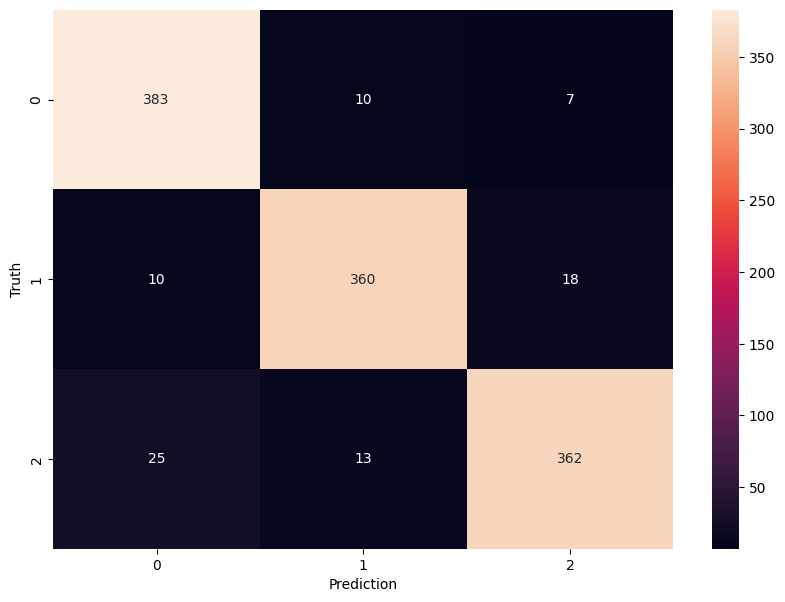

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## [**Solution**](./tf_idf_exercise_solutions.ipynb)